In [1]:
from mealpy import SMA, GA, PSO, StringVar, IntegerVar, FloatVar
from knn_problem_for_meta_heuristic import KnnProblemForMetaHeuristic
import pandas as pd

In [2]:
data = pd.read_csv("diabetes.csv")
attributes = data.drop("Outcome", axis=1)
target = data["Outcome"]

In [3]:
problem_bounds = [
    # Hiperparametreler
    FloatVar(lb=0.1, ub=0.3, name="test_size"),

    # KNN Hiperparametreleri
    IntegerVar(lb=1, ub=100, name="n_neighbors"),
    IntegerVar(lb=1, ub=5, name="leaf_size"),
    IntegerVar(lb=1, ub=5, name="p"),
    StringVar(valid_sets=('uniform', 'distance'), name="weights"),
    StringVar(valid_sets=('auto', 'ball_tree', 'kd_tree', 'brute'), name="algorithm"),
    StringVar(valid_sets=('euclidean', 'manhattan', 'minkowski'), name="metric"),
]

In [4]:
problem = KnnProblemForMetaHeuristic(attributes=attributes, target=target, bounds=problem_bounds)
model = PSO.OriginalPSO(epoch=500, pop_size=100)
model.solve(problem)

2025/07/01 06:06:11 PM, INFO, mealpy.swarm_based.PSO.OriginalPSO: OriginalPSO(epoch=500, pop_size=100, c1=2.05, c2=2.05, w=0.4)
2025/07/01 06:06:15 PM, INFO, mealpy.swarm_based.PSO.OriginalPSO: >>>Problem: P, Epoch: 1, Current best: 0.792, Global best: 0.792, Runtime: 1.93656 seconds
2025/07/01 06:06:17 PM, INFO, mealpy.swarm_based.PSO.OriginalPSO: >>>Problem: P, Epoch: 2, Current best: 0.7974683544303798, Global best: 0.7974683544303798, Runtime: 1.88804 seconds
2025/07/01 06:06:19 PM, INFO, mealpy.swarm_based.PSO.OriginalPSO: >>>Problem: P, Epoch: 3, Current best: 0.7974683544303798, Global best: 0.7974683544303798, Runtime: 1.81187 seconds
2025/07/01 06:06:21 PM, INFO, mealpy.swarm_based.PSO.OriginalPSO: >>>Problem: P, Epoch: 4, Current best: 0.7974683544303798, Global best: 0.7974683544303798, Runtime: 1.75191 seconds
2025/07/01 06:06:23 PM, INFO, mealpy.swarm_based.PSO.OriginalPSO: >>>Problem: P, Epoch: 5, Current best: 0.7974683544303798, Global best: 0.7974683544303798, Runtime:

id: 1106, target: Objectives: [0.80921053], Fitness: 0.8092105263157895, solution: [ 0.19691643 26.49855452  1.          3.          4.37518988  1.77657813
  1.        ]

In [5]:
# print(f"Best agent: {model.g_best}")
# print(f"Best solution: {model.g_best.solution}")
print(f"Best accuracy: {model.g_best.target.fitness}")
print(f"Best parameters: {model.problem.decode_solution(model.g_best.solution)}")

Best accuracy: 0.8092105263157895
Best parameters: {'test_size': 0.19691643362111463, 'n_neighbors': 26, 'weights': 'uniform', 'algorithm': 'kd_tree', 'leaf_size': 4, 'p': 2, 'metric': 'manhattan'}


In [6]:
genetic_model = GA.BaseGA(epoch=500, pop_size=100)
genetic_model.solve(problem)

2025/07/01 06:23:58 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: BaseGA(epoch=500, pop_size=100, pc=0.95, pm=0.025)
2025/07/01 06:24:04 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: >>>Problem: P, Epoch: 1, Current best: 0.7947019867549668, Global best: 0.7947019867549668, Runtime: 2.55182 seconds
2025/07/01 06:24:07 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: >>>Problem: P, Epoch: 2, Current best: 0.8017241379310345, Global best: 0.8017241379310345, Runtime: 2.71046 seconds
2025/07/01 06:24:09 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: >>>Problem: P, Epoch: 3, Current best: 0.8017241379310345, Global best: 0.8017241379310345, Runtime: 2.15923 seconds
2025/07/01 06:24:11 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: >>>Problem: P, Epoch: 4, Current best: 0.8017241379310345, Global best: 0.8017241379310345, Runtime: 2.29053 seconds
2025/07/01 06:24:14 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: >>>Problem: P, Epoch: 5, Current best: 0.8017241379310345, Global best: 0.80172

id: 102213, target: Objectives: [0.80327869], Fitness: 0.8032786885245902, solution: [ 0.15788105 43.          1.          1.          4.          1.
  1.        ]

In [7]:
print(f"Best accuracy: {genetic_model.g_best.target.fitness}")
print(f"Best parameters: {genetic_model.problem.decode_solution(genetic_model.g_best.solution)}")

Best accuracy: 0.8032786885245902
Best parameters: {'test_size': 0.15788105252887452, 'n_neighbors': 43, 'weights': 'uniform', 'algorithm': 'ball_tree', 'leaf_size': 4, 'p': 1, 'metric': 'manhattan'}


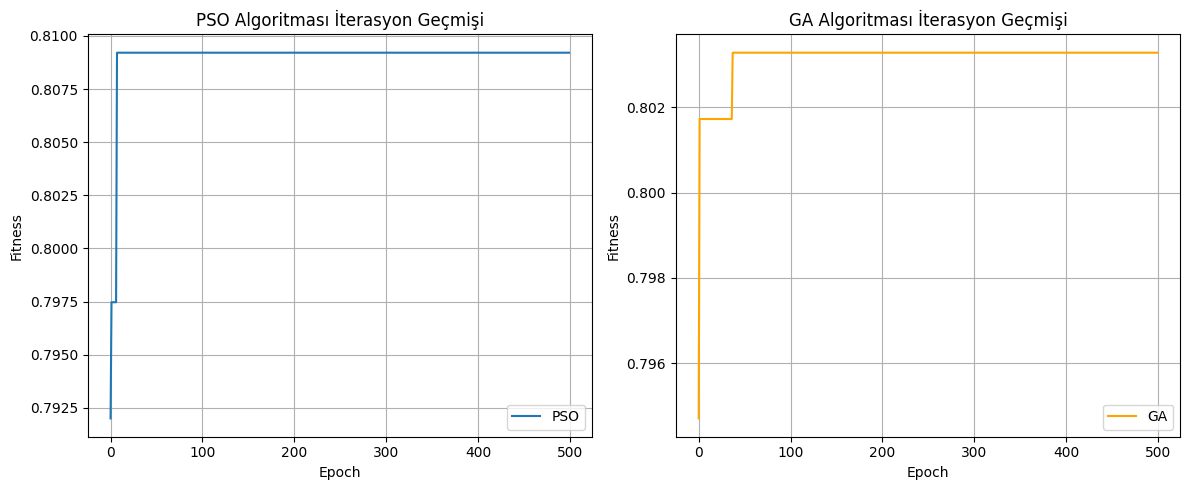

In [8]:
import matplotlib.pyplot as plt

# PSO modelinin iterasyon geçmişini çizme
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
fitness_history_pso = model.history.list_global_best_fit
plt.plot(fitness_history_pso, label='PSO')
plt.xlabel("Epoch")
plt.ylabel("Fitness")
plt.title("PSO Algoritması İterasyon Geçmişi")
plt.grid(True)
plt.legend()

# GA modelinin iterasyon geçmişini çizme
plt.subplot(1, 2, 2)
fitness_history_ga = genetic_model.history.list_global_best_fit
plt.plot(fitness_history_ga, label='GA', color='orange')
plt.xlabel("Epoch")
plt.ylabel("Fitness")
plt.title("GA Algoritması İterasyon Geçmişi")
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()